In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/hotels-booking-data-cleaned-version/hotel_booking_data_cleaned.csv')

# Display the first few rows of the dataset
data.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [2]:
# Display the shape of the dataset
data.shape


(119390, 32)

In [3]:
# Display the data types of each column
data.dtypes


hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [4]:
# Check for missing values in each column
missing_values = data.isnull().sum()
missing_values[missing_values > 0]


children         4
country        488
agent        16340
company     112593
dtype: int64

In [5]:
# Count the number of unique hotels and their booking distribution
hotel_counts = data['hotel'].value_counts()
hotel_counts


hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

In [6]:
# Calculate the overall cancellation rate
cancellation_rate = data['is_canceled'].mean()
cancellation_rate


0.37041628277075134

In [7]:
# Calculate the average lead time for bookings
average_lead_time = data['lead_time'].mean()
average_lead_time


104.01141636652986

In [8]:
# Display a summary of the numerical columns
data.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


**What is the distribution of booking cancellations based on the type of meal booked?**

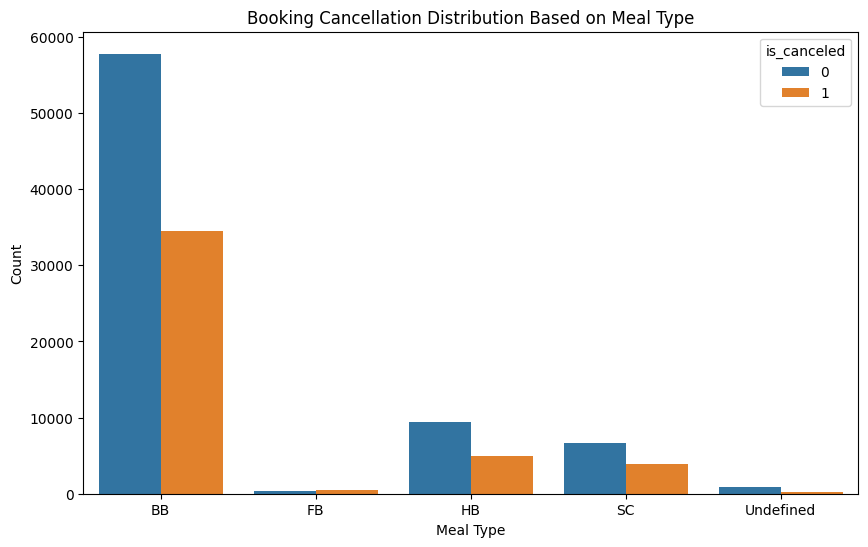

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for cancellation distribution based on meal type
plt.figure(figsize=(10, 6))
sns.countplot(x='meal', hue='is_canceled', data=data)
plt.title('Booking Cancellation Distribution Based on Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.show()


**Is there any correlation between the number of previous cancellations and the current booking being canceled?**

In [10]:
# Calculate the correlation between previous cancellations and current booking cancellation
correlation = data['previous_cancellations'].corr(data['is_canceled'])
correlation


0.11013280822284198

**What is the distribution of bookings over the years?**

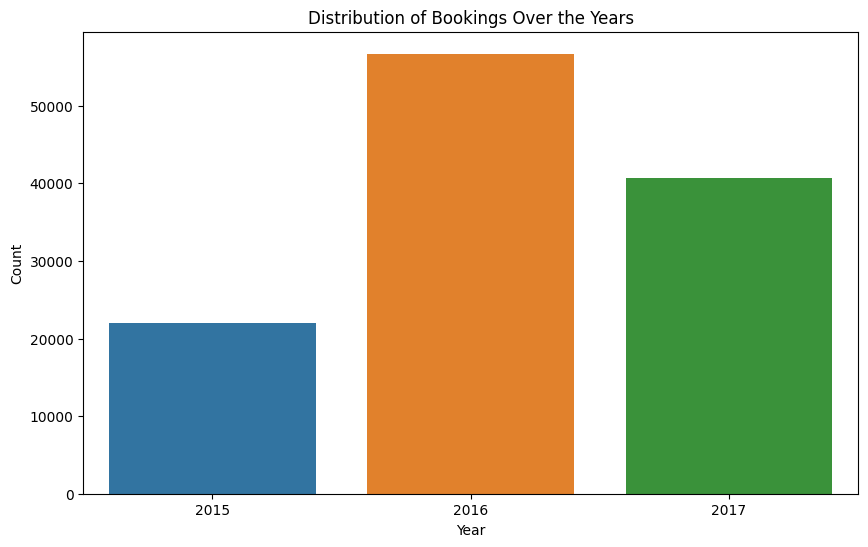

In [11]:
import matplotlib.pyplot as plt

# Create a bar plot for the distribution of bookings over the years
plt.figure(figsize=(10, 6))
sns.countplot(x='arrival_date_year', data=data)
plt.title('Distribution of Bookings Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


**How does the lead time vary for canceled and non-canceled bookings?**

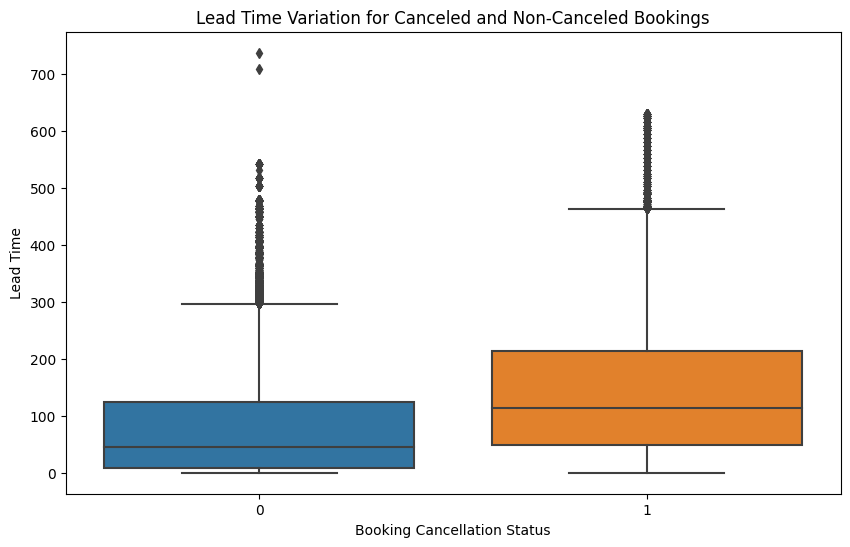

In [12]:
# Create a boxplot to visualize the lead time for canceled and non-canceled bookings
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_canceled', y='lead_time', data=data)
plt.title('Lead Time Variation for Canceled and Non-Canceled Bookings')
plt.xlabel('Booking Cancellation Status')
plt.ylabel('Lead Time')
plt.show()


**What is the distribution of bookings across different months?**

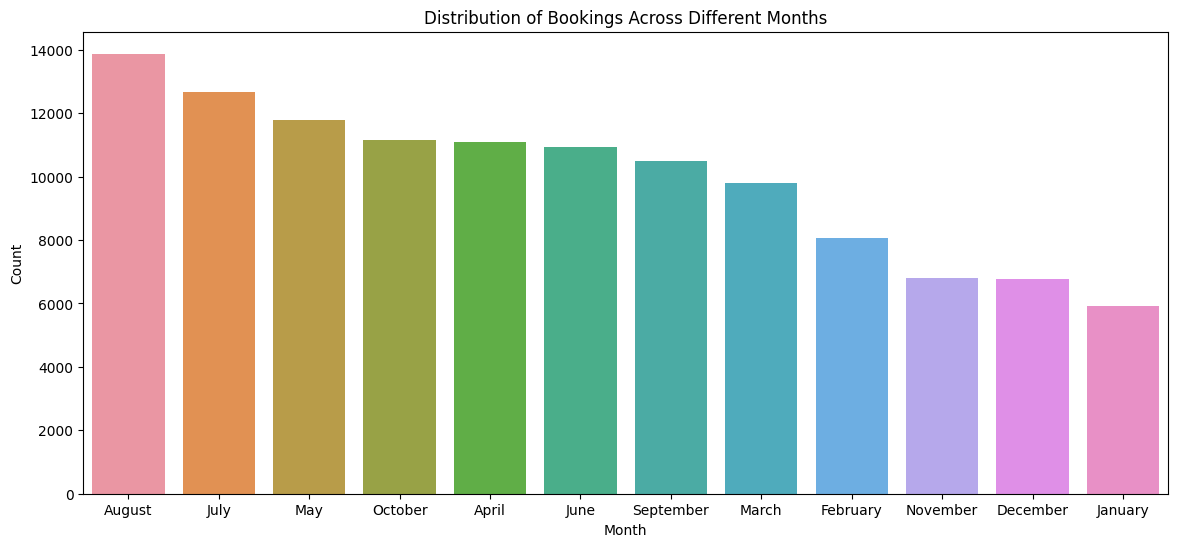

In [13]:
# Create a bar plot for the distribution of bookings across different months
plt.figure(figsize=(14, 6))
sns.countplot(x='arrival_date_month', data=data, order=data['arrival_date_month'].value_counts().index)
plt.title('Distribution of Bookings Across Different Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


**How is the distribution of total special requests for different types of hotels?**

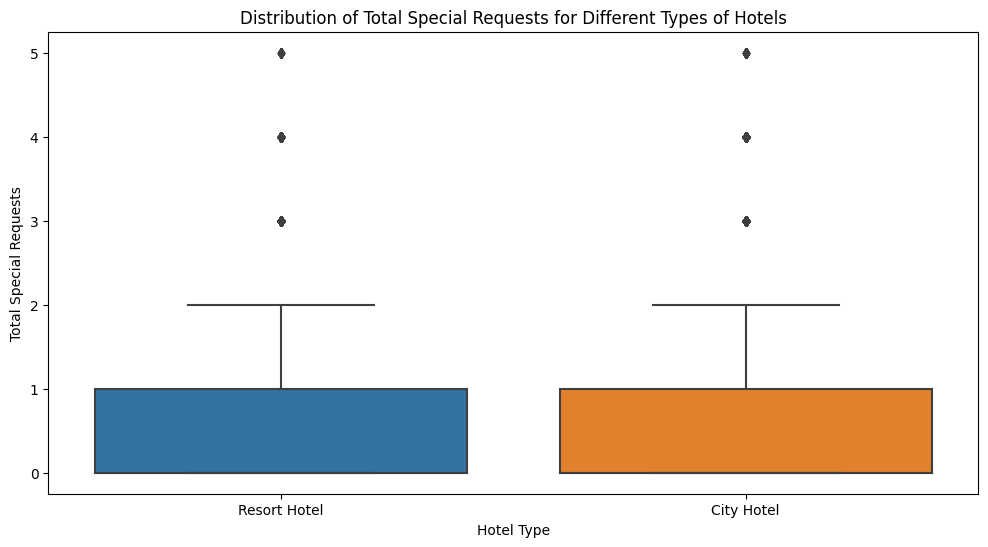

In [14]:
# Create a boxplot to visualize the distribution of total special requests for different types of hotels
plt.figure(figsize=(12, 6))
sns.boxplot(x='hotel', y='total_of_special_requests', data=data)
plt.title('Distribution of Total Special Requests for Different Types of Hotels')
plt.xlabel('Hotel Type')
plt.ylabel('Total Special Requests')
plt.show()


**Can you visualize the correlation between numerical features using a heatmap?**

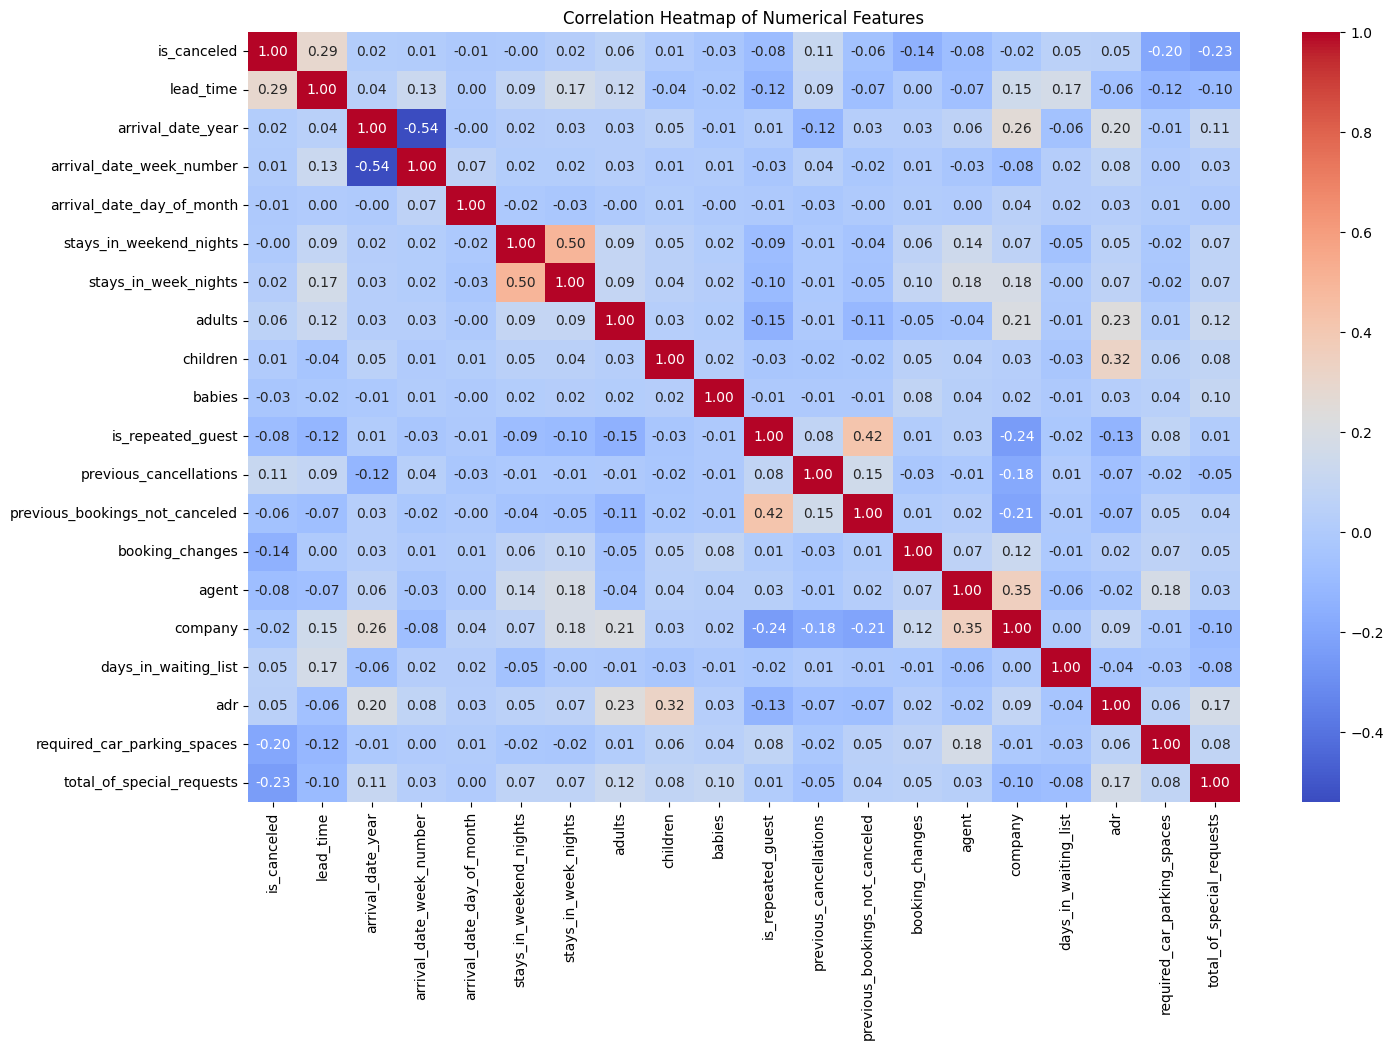

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Create a heatmap to visualize the correlation between numerical features
plt.figure(figsize=(16, 10))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


**What is the distribution of lead time for bookings?**

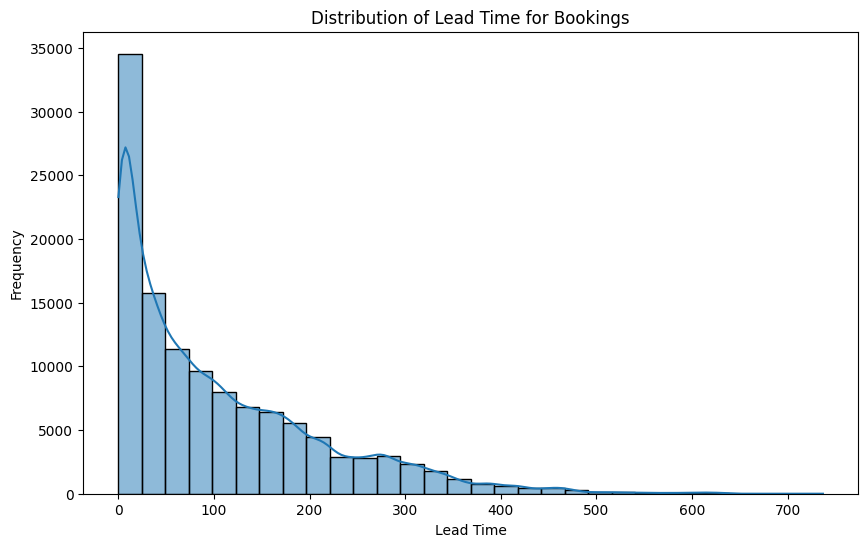

In [16]:
# Create a histogram to visualize the distribution of lead time for bookings
plt.figure(figsize=(10, 6))
sns.histplot(data['lead_time'], bins=30, kde=True)
plt.title('Distribution of Lead Time for Bookings')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()


**How does the number of special requests vary across bookings?**

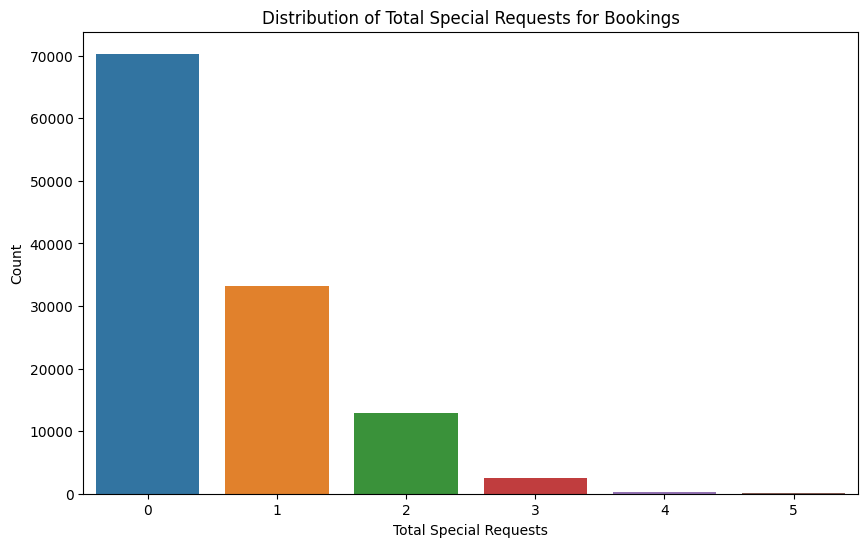

In [17]:
# Create a countplot to visualize the distribution of total special requests for bookings
plt.figure(figsize=(10, 6))
sns.countplot(x='total_of_special_requests', data=data)
plt.title('Distribution of Total Special Requests for Bookings')
plt.xlabel('Total Special Requests')
plt.ylabel('Count')
plt.show()


**What is the distribution of the average daily rate (ADR) for different hotel types?**

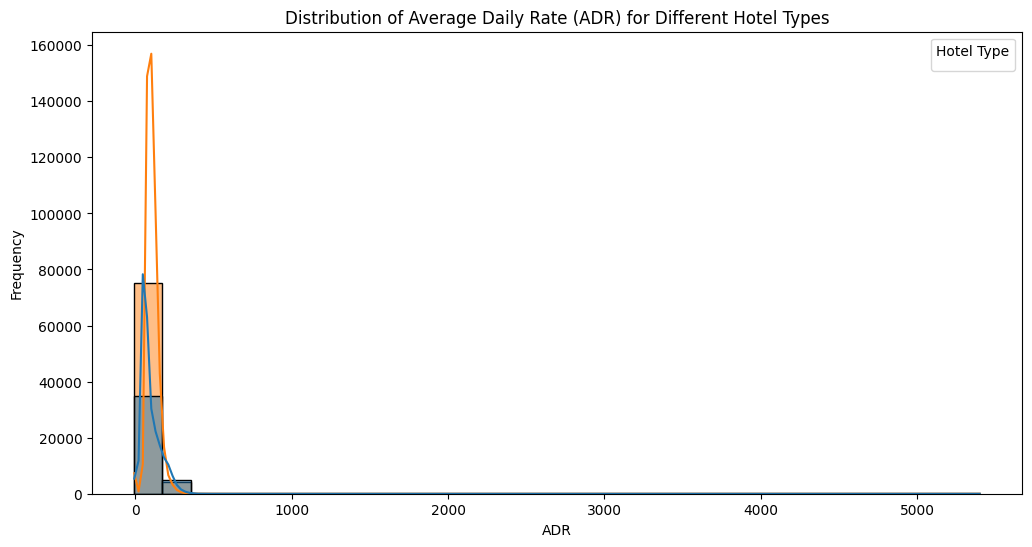

In [18]:
# Create a histogram to visualize the distribution of ADR for different hotel types
plt.figure(figsize=(12, 6))
sns.histplot(data, x='adr', hue='hotel', bins=30, kde=True, common_norm=False)
plt.title('Distribution of Average Daily Rate (ADR) for Different Hotel Types')
plt.xlabel('ADR')
plt.ylabel('Frequency')
plt.legend(title='Hotel Type')
plt.show()


**How are the stays in weekend nights and stays in week nights distributed?**

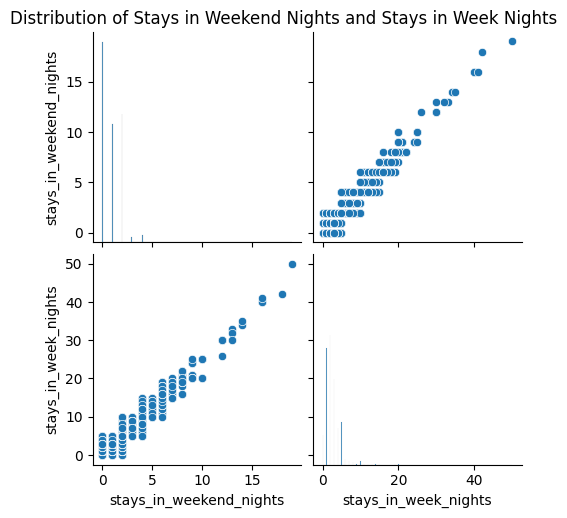

In [19]:
# Create a pairplot to visualize the distribution of stays in weekend nights and stays in week nights
sns.pairplot(data[['stays_in_weekend_nights', 'stays_in_week_nights']])
plt.suptitle('Distribution of Stays in Weekend Nights and Stays in Week Nights', y=1.02)
plt.show()


**What is the distribution of lead time for bookings that were canceled versus those that were not canceled?**

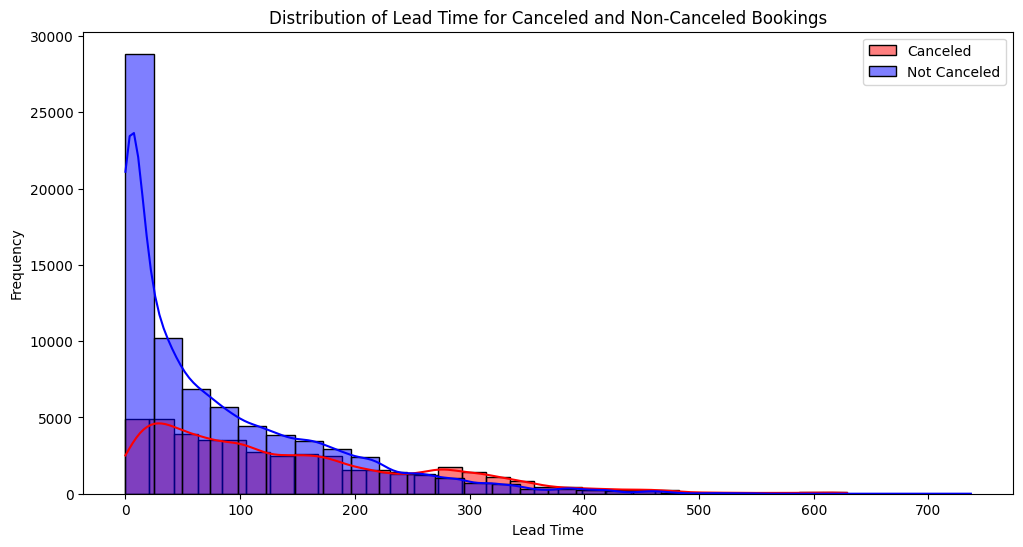

In [20]:
# Create two histograms to compare the distribution of lead time for canceled and non-canceled bookings
plt.figure(figsize=(12, 6))
sns.histplot(data[data['is_canceled'] == 1]['lead_time'], bins=30, kde=True, label='Canceled', color='red')
sns.histplot(data[data['is_canceled'] == 0]['lead_time'], bins=30, kde=True, label='Not Canceled', color='blue')
plt.title('Distribution of Lead Time for Canceled and Non-Canceled Bookings')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**What is the distribution of the number of adults, children, and babies in the bookings?**

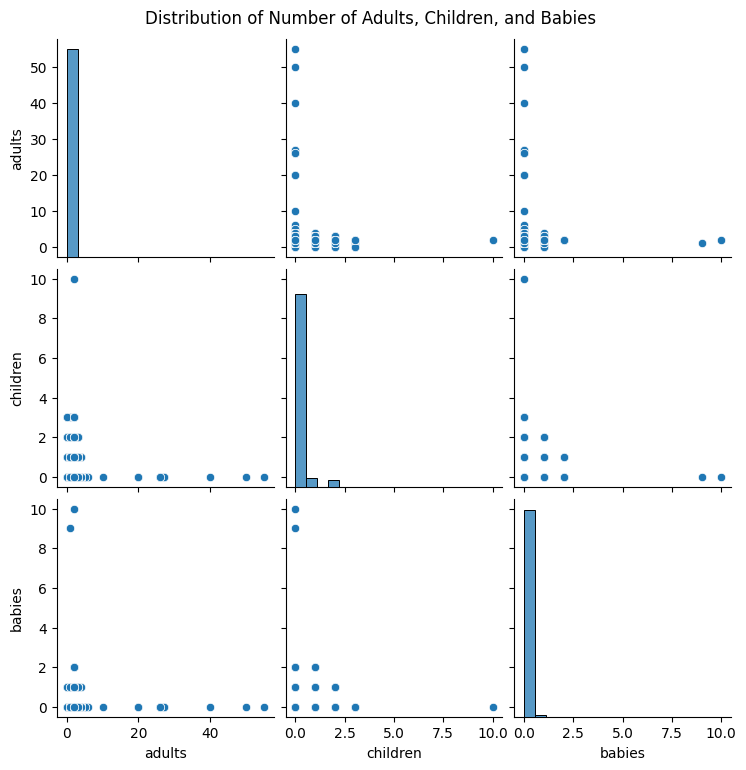

In [21]:
# Create a pairplot to visualize the distribution of adults, children, and babies
sns.pairplot(data[['adults', 'children', 'babies']])
plt.suptitle('Distribution of Number of Adults, Children, and Babies', y=1.02)
plt.show()


**How does the number of booking changes relate to the cancellation status?**

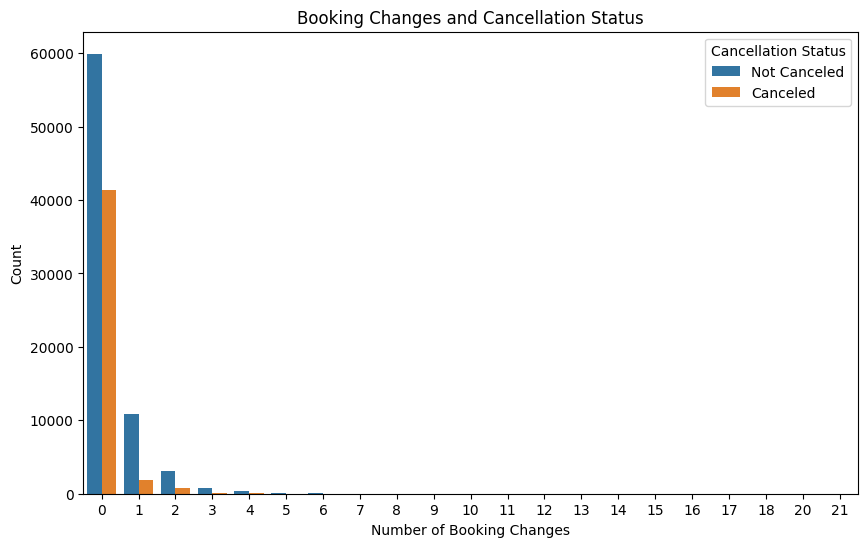

In [22]:
# Create a countplot to visualize the relationship between booking changes and cancellation status
plt.figure(figsize=(10, 6))
sns.countplot(x='booking_changes', hue='is_canceled', data=data)
plt.title('Booking Changes and Cancellation Status')
plt.xlabel('Number of Booking Changes')
plt.ylabel('Count')
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.show()


**What is the distribution of the number of days in waiting list for bookings?**

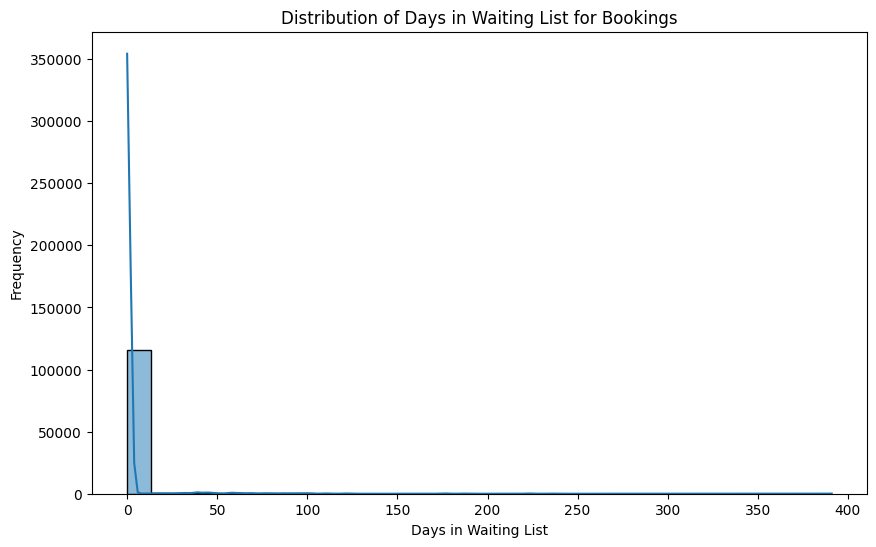

In [23]:
# Create a histogram to visualize the distribution of days in waiting list for bookings
plt.figure(figsize=(10, 6))
sns.histplot(data['days_in_waiting_list'], bins=30, kde=True)
plt.title('Distribution of Days in Waiting List for Bookings')
plt.xlabel('Days in Waiting List')
plt.ylabel('Frequency')
plt.show()


**How does the average daily rate (ADR) vary across different market segments?**

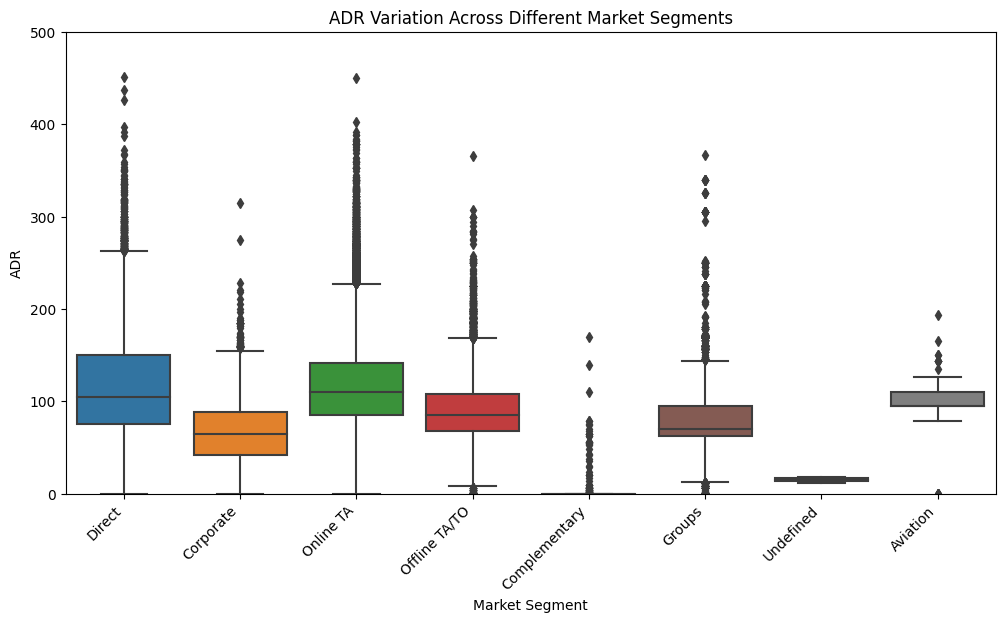

In [24]:
# Create a boxplot to visualize the distribution of ADR for different market segments
plt.figure(figsize=(12, 6))
sns.boxplot(x='market_segment', y='adr', data=data)
plt.title('ADR Variation Across Different Market Segments')
plt.xlabel('Market Segment')
plt.ylabel('ADR')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 500)
plt.show()


**What is the distribution of the number of previous bookings (not canceled) for customers?**

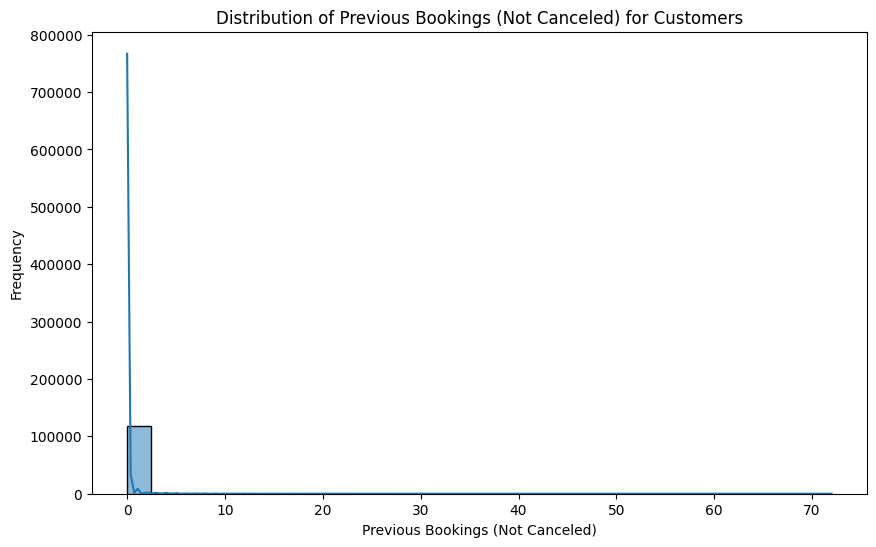

In [25]:
# Create a histogram to visualize the distribution of previous bookings (not canceled) for customers
plt.figure(figsize=(10, 6))
sns.histplot(data['previous_bookings_not_canceled'], bins=30, kde=True)
plt.title('Distribution of Previous Bookings (Not Canceled) for Customers')
plt.xlabel('Previous Bookings (Not Canceled)')
plt.ylabel('Frequency')
plt.show()


**What is the distribution of the number of stays in weekend nights versus stays in week nights?**

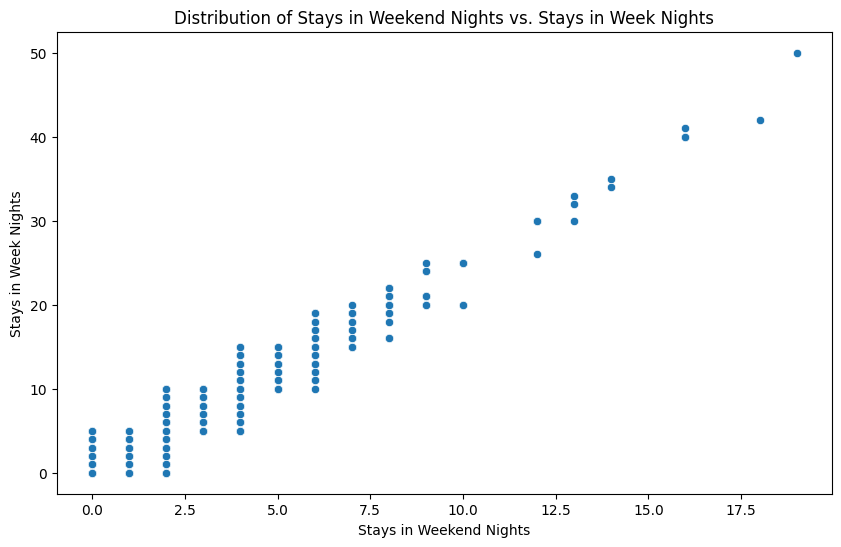

In [26]:
# Create a scatter plot to visualize the distribution of stays in weekend nights versus stays in week nights
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stays_in_weekend_nights', y='stays_in_week_nights', data=data)
plt.title('Distribution of Stays in Weekend Nights vs. Stays in Week Nights')
plt.xlabel('Stays in Weekend Nights')
plt.ylabel('Stays in Week Nights')
plt.show()


**What is the distribution of the number of special requests based on customer type?**

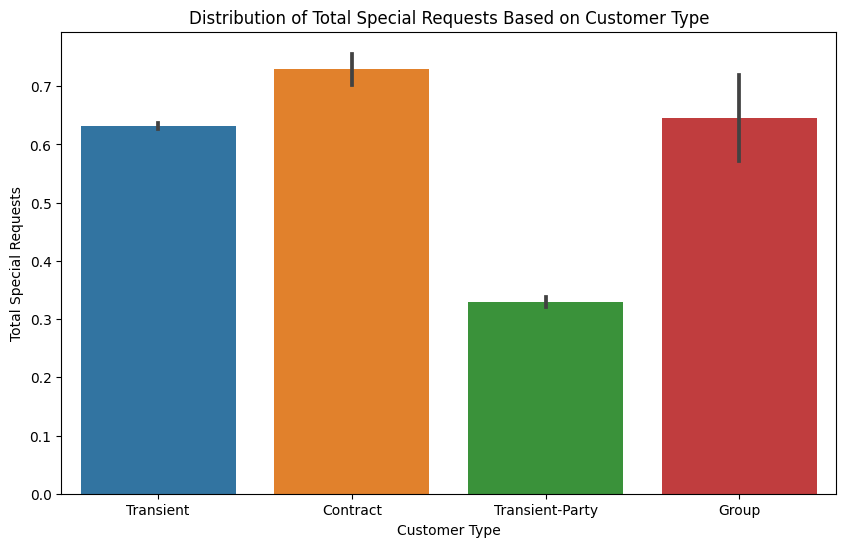

In [27]:
# Create a bar plot to visualize the distribution of total special requests based on customer type
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_type', y='total_of_special_requests', data=data)
plt.title('Distribution of Total Special Requests Based on Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Special Requests')
plt.show()


**How does the distribution of booking cancellations vary based on hotel type?**

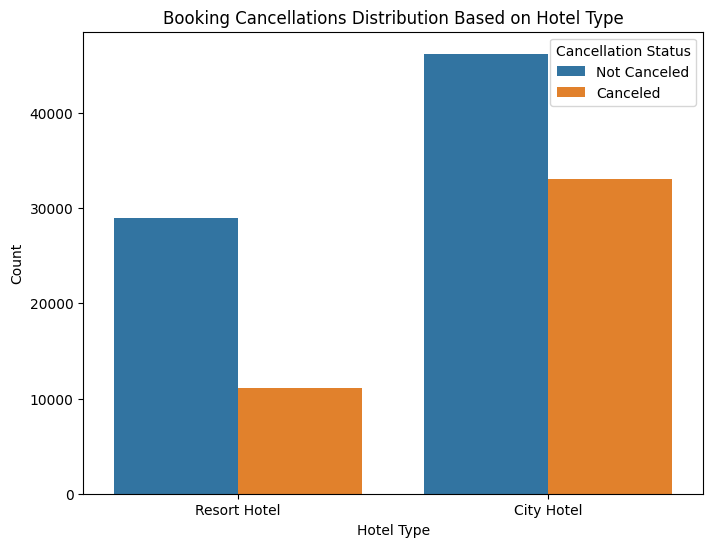

In [28]:
# Create a bar plot to visualize the distribution of booking cancellations based on hotel type
plt.figure(figsize=(8, 6))
sns.countplot(x='hotel', hue='is_canceled', data=data)
plt.title('Booking Cancellations Distribution Based on Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.show()


**What is the distribution of booking cancellations across different meal types?**

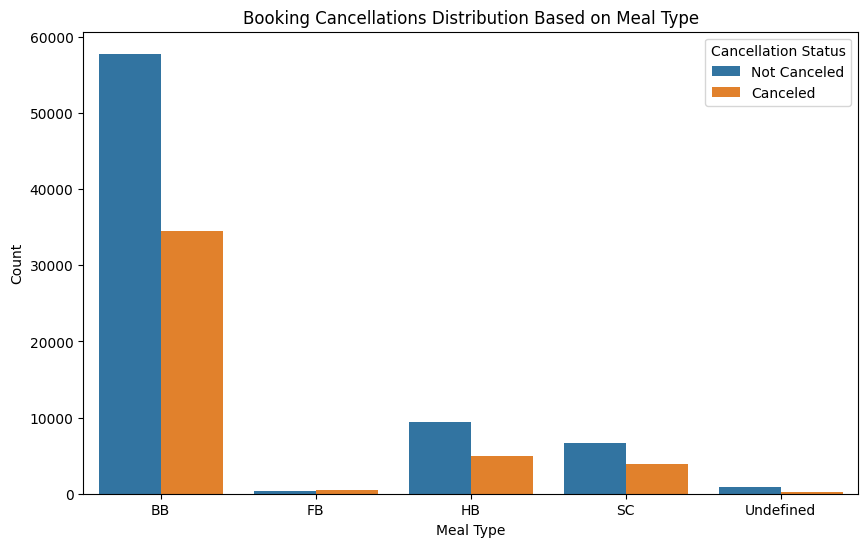

In [29]:
# Create a bar plot to visualize the distribution of booking cancellations based on meal type
plt.figure(figsize=(10, 6))
sns.countplot(x='meal', hue='is_canceled', data=data)
plt.title('Booking Cancellations Distribution Based on Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.show()


**How do booking cancellations vary across different market segments?**

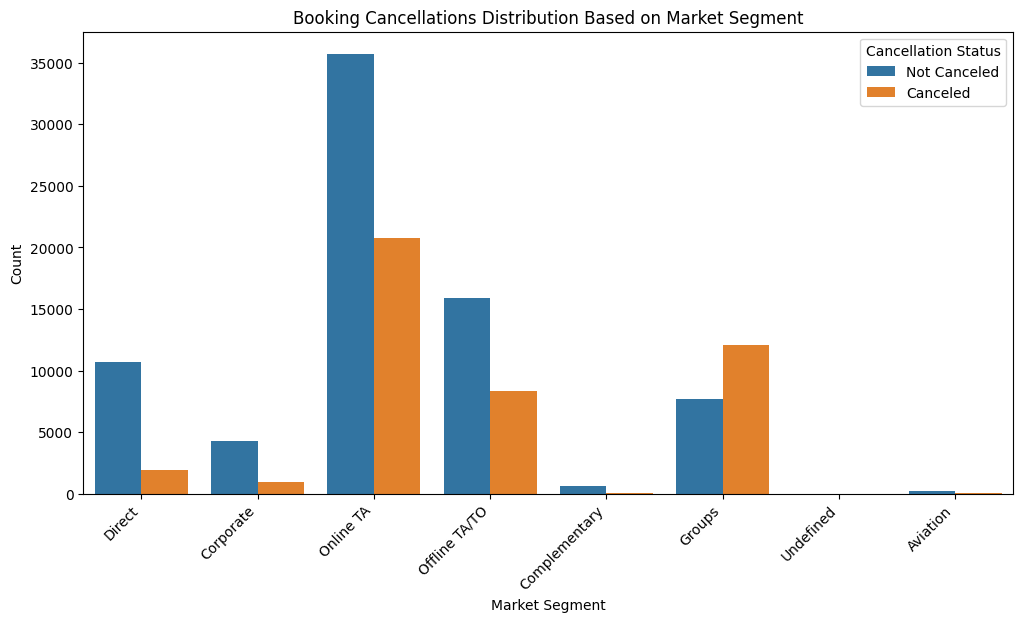

In [30]:
# Create a bar plot to visualize the distribution of booking cancellations based on market segment
plt.figure(figsize=(12, 6))
sns.countplot(x='market_segment', hue='is_canceled', data=data)
plt.title('Booking Cancellations Distribution Based on Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.xticks(rotation=45, ha='right')
plt.show()


**What is the distribution of booking cancellations for different customer types?**

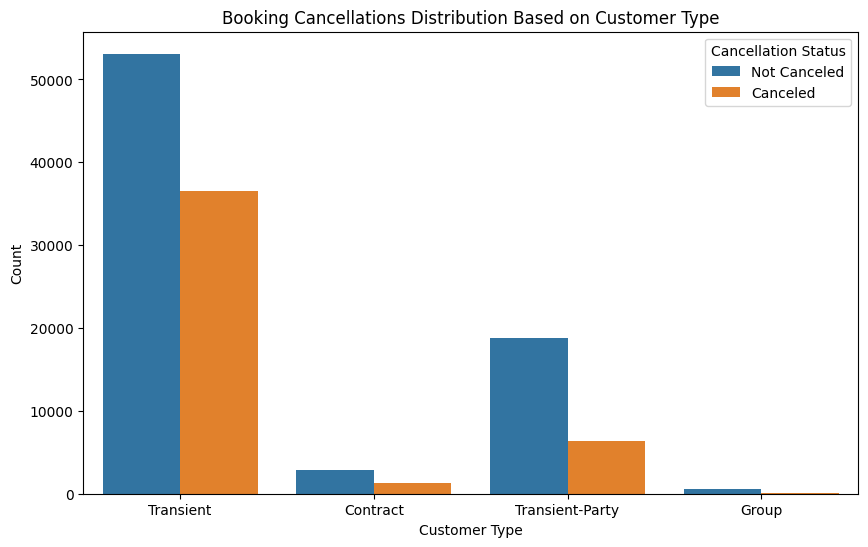

In [31]:
# Create a bar plot to visualize the distribution of booking cancellations based on customer type
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_type', hue='is_canceled', data=data)
plt.title('Booking Cancellations Distribution Based on Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.show()


**How are booking cancellations distributed across different deposit types?**

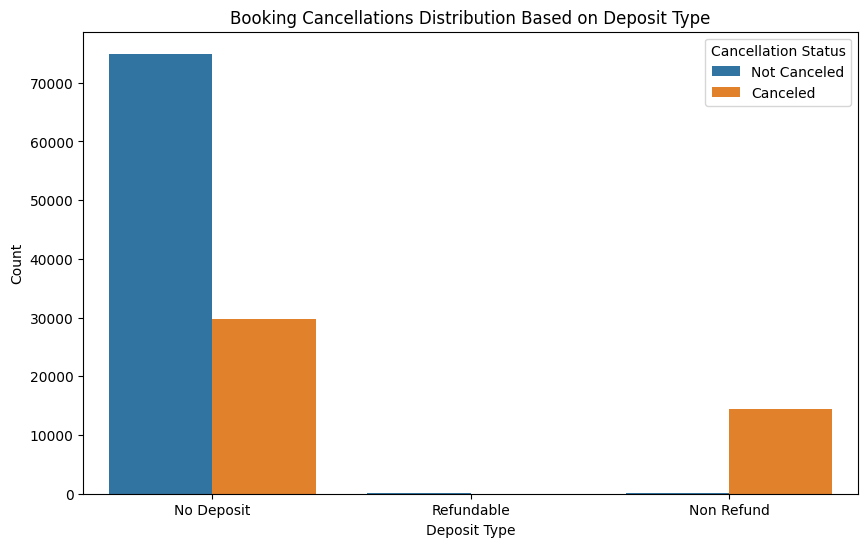

In [32]:
# Create a bar plot to visualize the distribution of booking cancellations based on deposit type
plt.figure(figsize=(10, 6))
sns.countplot(x='deposit_type', hue='is_canceled', data=data)
plt.title('Booking Cancellations Distribution Based on Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.show()


**How does lead time correlate with the average daily rate (ADR) for hotel bookings?**

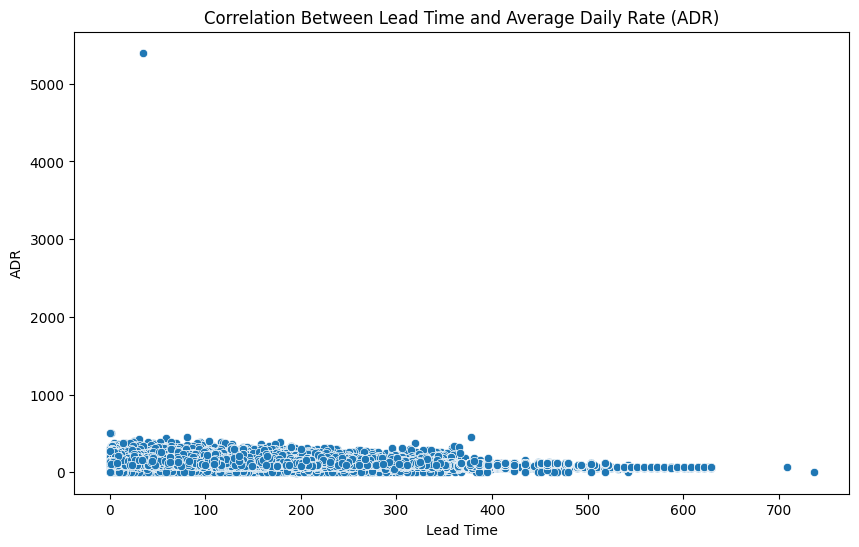

In [33]:
# Create a scatter plot to visualize the correlation between lead time and ADR
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lead_time', y='adr', data=data)
plt.title('Correlation Between Lead Time and Average Daily Rate (ADR)')
plt.xlabel('Lead Time')
plt.ylabel('ADR')
plt.show()


**Can we observe any correlation between the number of booking changes and the average daily rate (ADR)?**

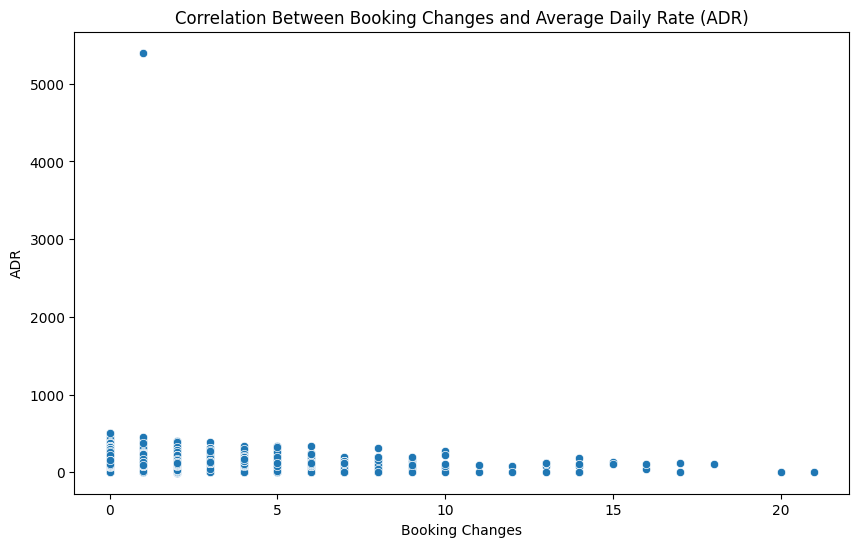

In [34]:
# Create a scatter plot to visualize the correlation between booking changes and ADR
plt.figure(figsize=(10, 6))
sns.scatterplot(x='booking_changes', y='adr', data=data)
plt.title('Correlation Between Booking Changes and Average Daily Rate (ADR)')
plt.xlabel('Booking Changes')
plt.ylabel('ADR')
plt.show()


**How does the lead time vary for different numbers of total special requests?**

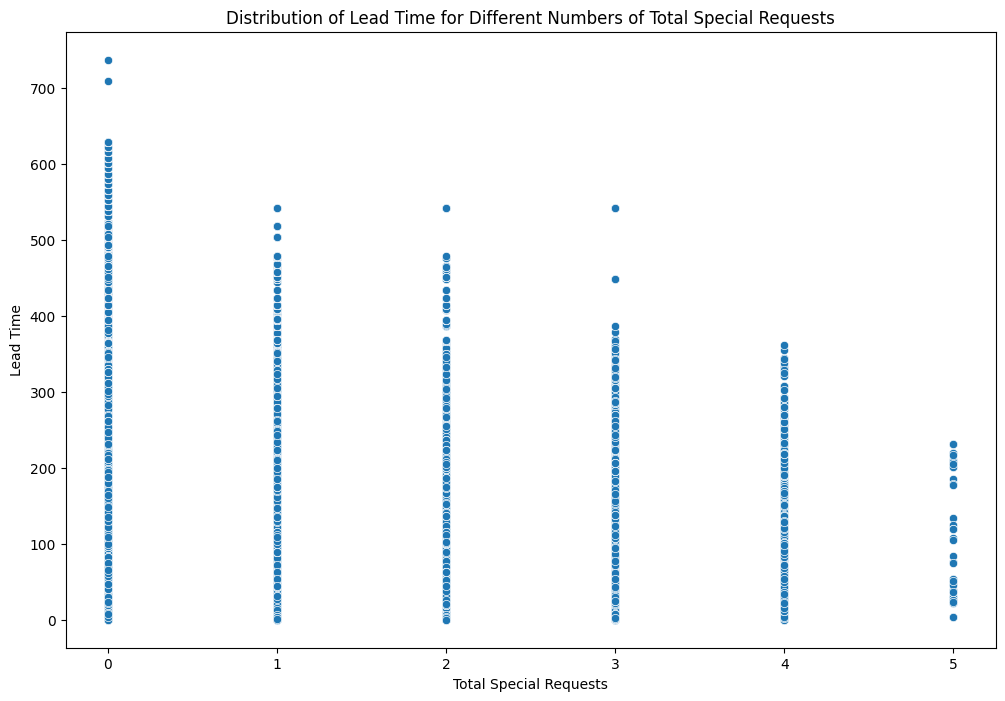

In [35]:
# Create a scatter plot to visualize the distribution of lead time for different numbers of total special requests
plt.figure(figsize=(12, 8))
sns.scatterplot(x='total_of_special_requests', y='lead_time', data=data)
plt.title('Distribution of Lead Time for Different Numbers of Total Special Requests')
plt.xlabel('Total Special Requests')
plt.ylabel('Lead Time')
plt.show()


**How does the average daily rate (ADR) vary for different types of hotels using a bar plot?**

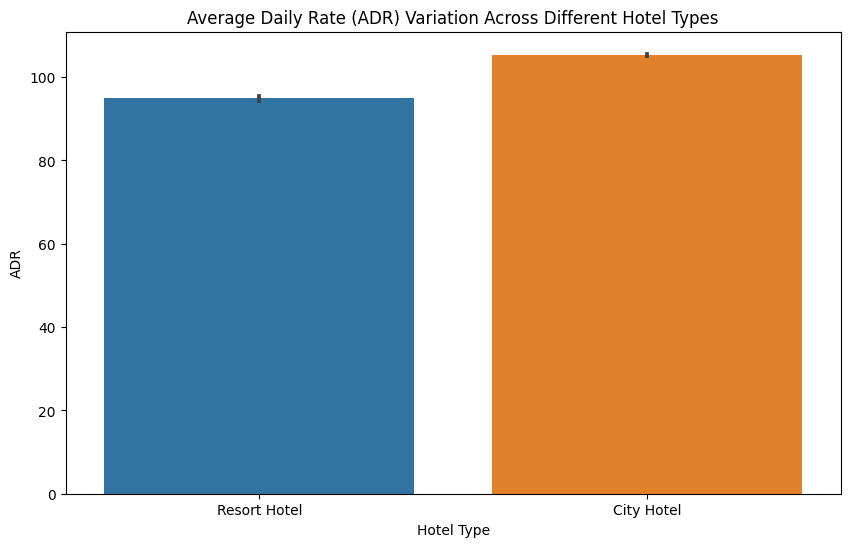

In [36]:
# Create a bar plot to visualize the average daily rate (ADR) for different types of hotels
plt.figure(figsize=(10, 6))
sns.barplot(x='hotel', y='adr', data=data)
plt.title('Average Daily Rate (ADR) Variation Across Different Hotel Types')
plt.xlabel('Hotel Type')
plt.ylabel('ADR')
plt.show()

**Is there a relationship between lead time and the number of booking changes using a scatter plot?**

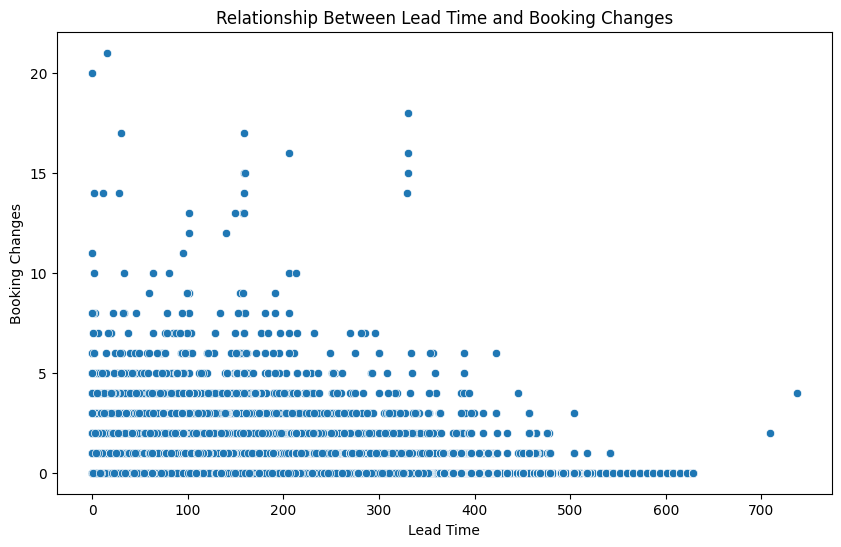

In [37]:
# Create a scatter plot to visualize the relationship between lead time and booking changes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lead_time', y='booking_changes', data=data)
plt.title('Relationship Between Lead Time and Booking Changes')
plt.xlabel('Lead Time')
plt.ylabel('Booking Changes')
plt.show()
